In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('abalone.csv')

In [6]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [7]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [8]:
df['Length'].mean()

0.5239920995930099

In [9]:
df['Length'].median()

0.545

In [10]:
df['Length'].std()

0.12009291256479998

# frequency table


In [11]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

# create charts

<AxesSubplot:>

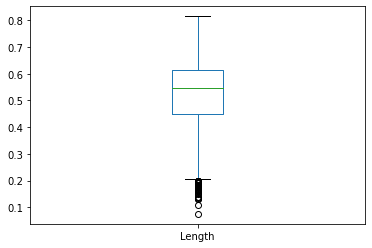

In [12]:
df.boxplot(column=['Length'], grid=False)

array([[<AxesSubplot:title={'center':'Length'}>]], dtype=object)

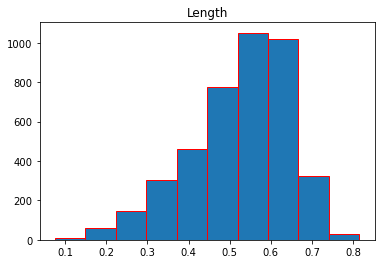

In [13]:
df.hist(column='Length', grid=False, edgecolor='red')

<AxesSubplot:xlabel='Length', ylabel='Density'>

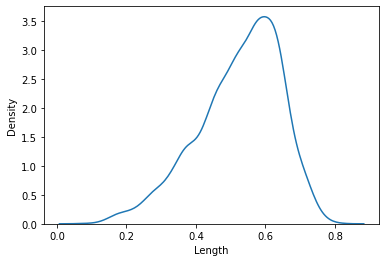

In [14]:
sns.kdeplot(df['Length'])

# Bi-Variate analysis


 1.scatterplots

Text(0, 0.5, 'Height')

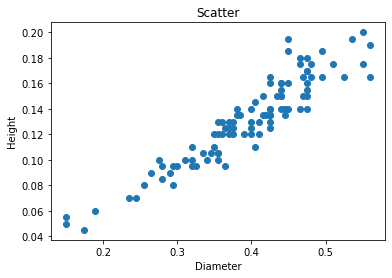

In [15]:
plt.scatter(df.Diameter.head(100),df.Height.head(100))
plt.title('Scatter')
plt.xlabel('Diameter')
plt.ylabel('Height')

2.Correlatiom Coefficients

In [16]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


3.Simple linear Regression

In [17]:
import statsmodels.api as sm

In [18]:
y = df['Length']
x = df['Rings']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Length   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     1875.
Date:                Sun, 09 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:27:43   Log-Likelihood:                 3701.5
No. Observations:                4177   AIC:                            -7399.
Df Residuals:                    4175   BIC:                            -7386.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3180      0.005     63.586      0.000       0.308       0.328
Rings          0.0207      0.000     43.303      0.000       0.020       0.022
==============================================================================
Omnibus:                      135.399   Durbin-Watson:                   0.502
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.814
Skew:                          -0.285   Prob(JB):                     1.28e-22
Kurtosis:                       2.497   Cond. No.                         34.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'shellweight')

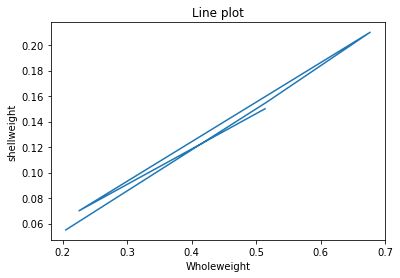

In [19]:
plt.plot(df['Whole weight'].head(),df['Shell weight'].head(),)

plt.title('Line plot')
plt.xlabel('Wholeweight')
plt.ylabel('shellweight')

# Multi-Variate Analysis

<AxesSubplot:>

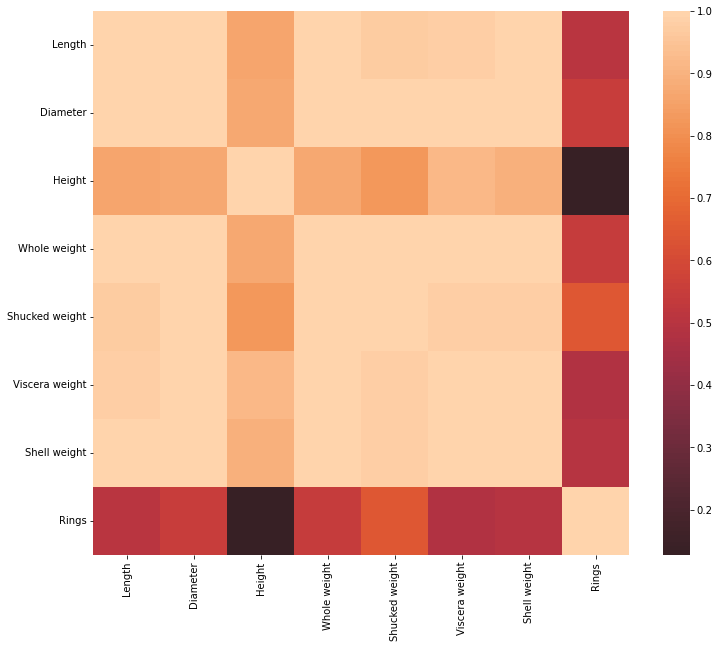

In [20]:
f = plt.subplots(figsize=(12,10))
sns.heatmap(df.head().corr(), center=0)

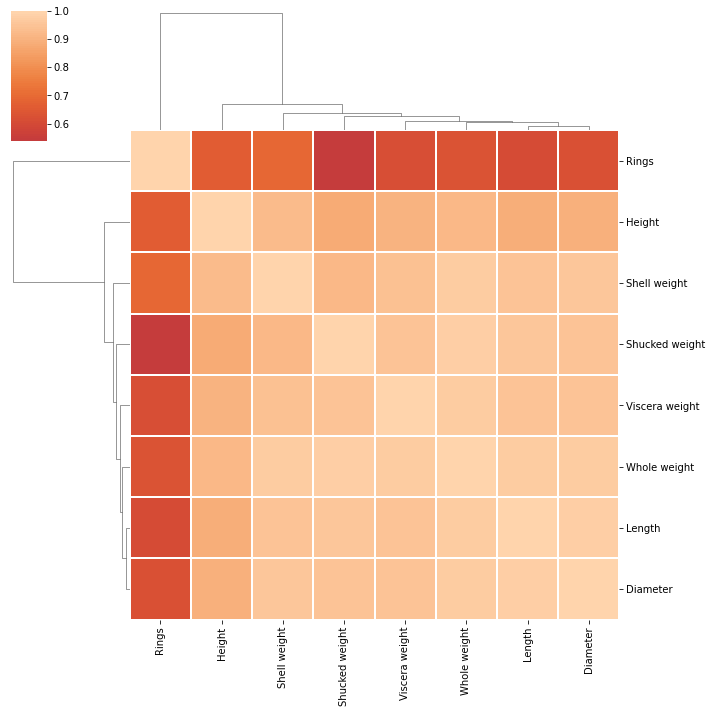

In [21]:
corrmat = df.corr(method='spearman')
cg = sns.clustermap(corrmat, center=0, linewidths=0.1);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
cg

# 4. Perform descriptive statistics on the data set

In [22]:
df.shape

(4177, 9)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [24]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [25]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [26]:
df.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [28]:
df.mean(numeric_only=True)

Length            0.523992
Diameter          0.407881
Height            0.139516
Whole weight      0.828742
Shucked weight    0.359367
Viscera weight    0.180594
Shell weight      0.238831
Rings             9.933684
dtype: float64

In [29]:
df.median(numeric_only=True)

Length            0.5450
Diameter          0.4250
Height            0.1400
Whole weight      0.7995
Shucked weight    0.3360
Viscera weight    0.1710
Shell weight      0.2340
Rings             9.0000
dtype: float64

In [30]:
df.mode()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.550,0.45,0.15,0.2225,0.175,0.1715,0.275,9.0
1,NaN,0.625,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df.var(numeric_only=True)

Length             0.014422
Diameter           0.009849
Height             0.001750
Whole weight       0.240481
Shucked weight     0.049268
Viscera weight     0.012015
Shell weight       0.019377
Rings             10.395266
dtype: float64

In [32]:
df.std(numeric_only=True)

Length            0.120093
Diameter          0.099240
Height            0.041827
Whole weight      0.490389
Shucked weight    0.221963
Viscera weight    0.109614
Shell weight      0.139203
Rings             3.224169
dtype: float64

In [33]:
df.skew(numeric_only=True)

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [34]:
df.kurt(numeric_only=True)

Length             0.064621
Diameter          -0.045476
Height            76.025509
Whole weight      -0.023644
Shucked weight     0.595124
Viscera weight     0.084012
Shell weight       0.531926
Rings              2.330687
dtype: float64

In [36]:
quantile = df['Length'].quantile(q=[0.75,0.25])
quantile

0.75    0.615
0.25    0.450
Name: Length, dtype: float64

<AxesSubplot:xlabel='Length'>

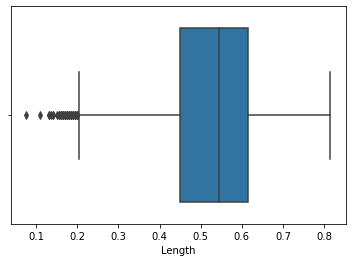

In [37]:
x = df.Length
sns.boxplot(x=x)

# 5.Handle the Missing values

In [38]:
print(df.isnull())

        Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0     False   False     False   False         False           False   
1     False   False     False   False         False           False   
2     False   False     False   False         False           False   
3     False   False     False   False         False           False   
4     False   False     False   False         False           False   
...     ...     ...       ...     ...           ...             ...   
4172  False   False     False   False         False           False   
4173  False   False     False   False         False           False   
4174  False   False     False   False         False           False   
4175  False   False     False   False         False           False   
4176  False   False     False   False         False           False   

      Viscera weight  Shell weight  Rings  
0              False         False  False  
1              False         False  False  
2              

In [39]:
print(df.isnull().sum())

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64


In [40]:
df.isna().any()

Sex               False
Length            False
Diameter          False
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
Rings             False
dtype: bool

# 6.find the outliers and replace the outliers

<AxesSubplot:xlabel='Rings'>

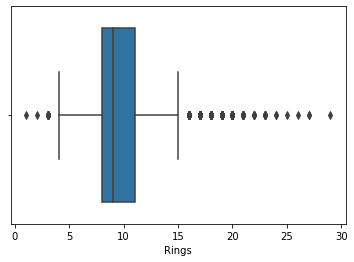

In [42]:
x = sns.boxplot(x=df["Rings"])
x

<AxesSubplot:xlabel='Rings'>

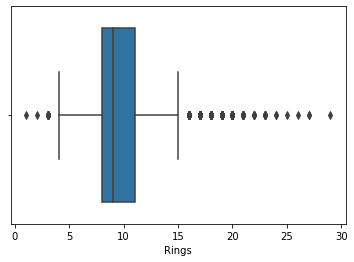

In [43]:
x = df.Rings
sns.boxplot(x=x)

In [46]:
x = np.where(df['Rings']>30,20,df['Rings'])

<AxesSubplot:>

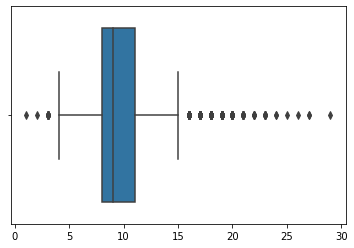

In [47]:
sns.boxplot(x=x)

# 7.check for categorical columns and perform encoding.

In [48]:
pd.Categorical(df["Diameter"])

C:\ProgramData\Anaconda3\lib\site-packages\IPython\lib\pretty.py:778: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  output = repr(obj)


[0.365, 0.265, 0.420, 0.365, 0.255, ..., 0.450, 0.440, 0.475, 0.485, 0.555]
Length: 4177
Categories (111, float64): [0.055, 0.090, 0.095, 0.100, ..., 0.620, 0.625, 0.630, 0.650]

In [49]:
pd.get_dummies(df["Sex"]).head(10)

,F,I,M
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
5,0,1,0
6,1,0,0
7,1,0,0
8,0,0,1
9,1,0,0


In [50]:
pd.get_dummies(df).head(10)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0
5,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,0,1,0
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20,1,0,0
7,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16,1,0,0
8,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9,0,0,1
9,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19,1,0,0


# 8.split the data into dependent and independent variables.

In [51]:
x = df.iloc[:, :-1].values
print(x)

[['M' 0.455 0.365 ... 0.2245 0.101 0.15]
 ['M' 0.35 0.265 ... 0.0995 0.0485 0.07]
 ['F' 0.53 0.42 ... 0.2565 0.1415 0.21]
 ...
 ['M' 0.6 0.475 ... 0.5255 0.2875 0.308]
 ['F' 0.625 0.485 ... 0.531 0.261 0.296]
 ['M' 0.71 0.555 ... 0.9455 0.3765 0.495]]


In [52]:
# extracting the dataset  to get the dependent

y = df.iloc[:, -1].values
print(y)

[15  7  9 ...  9 10 12]


# 9. Scale the independent variables

In [82]:
from sklearn.preprocessing import scale

In [83]:
x = scale(df["Viscera weight"])
x

array([-0.72621157, -1.20522124, -0.35668983, ...,  0.97541324,
        0.73362741,  1.78744868])

# 10.Split the data into training and testing

In [67]:
x = df.iloc[:, 1:7]
x

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010
1,0.350,0.265,0.090,0.2255,0.0995,0.0485
2,0.530,0.420,0.135,0.6770,0.2565,0.1415
3,0.440,0.365,0.125,0.5160,0.2155,0.1140
4,0.330,0.255,0.080,0.2050,0.0895,0.0395
...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610


In [68]:
y = df.iloc[:, -1]
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

#

#

In [55]:
from sklearn.model_selection import train_test_split

In [69]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state =42)

In [57]:
y = df.Length
y

0       0.455
1       0.350
2       0.530
3       0.440
4       0.330
        ...  
4172    0.565
4173    0.590
4174    0.600
4175    0.625
4176    0.710
Name: Length, Length: 4177, dtype: float64

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [70]:


x_train.shape



(3132, 6)

In [71]:


y_test.shape



(1045,)

In [72]:


x_train.head()



,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight
3823,0.615,0.455,0.135,1.0590,0.4735,0.2630
3956,0.515,0.395,0.140,0.6860,0.2810,0.1255
3623,0.660,0.530,0.175,1.5830,0.7395,0.3505
0,0.455,0.365,0.095,0.5140,0.2245,0.1010
2183,0.495,0.400,0.155,0.8085,0.2345,0.1155


In [73]:
x_test.head()




,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight
866,0.605,0.455,0.160,1.1035,0.4210,0.3015
1483,0.590,0.440,0.150,0.8725,0.3870,0.2150
599,0.560,0.445,0.195,0.9810,0.3050,0.2245
1702,0.635,0.490,0.170,1.2615,0.5385,0.2665
670,0.475,0.385,0.145,0.6175,0.2350,0.1080


In [74]:
y_train.head()

3823     9
3956    12
3623    10
0       15
2183     6
Name: Rings, dtype: int64

In [75]:


y_test.head()



866      9
1483     8
599     16
1702     9
670     14
Name: Rings, dtype: int64

# 11.Build the model

In [76]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

In [77]:
model=LinearRegression()

In [78]:


model.fit(x_train,y_train)







LinearRegression()

# train the model

In [1]:
#

In [79]:
Y_predict_train = model.predict(x_train)
Y_predict_train

array([ 9.75888828, 10.45379472, 10.83692259, ...,  9.62903068,
        9.21152746, 10.09516371])

# test the model

In [80]:
y_predict = model.predict(x_test)
y_predict

array([11.5478407 ,  9.93166184, 14.09825921, ..., 12.19440346,
       10.29279231,  9.33037939])

Measure the performance using Metrics

In [81]:
print(mean_squared_error(y_test, y_predict))
print(math.sqrt(mean_squared_error(y_test, y_predict)))

4.862459933051859
2.205098622069285
